# Eyes

## Imports

In [127]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../DataLoader')

from Dataset import Dataset
import helpers
from helpers import imshow

## Creation of a Dataset container

In [128]:
DATASET_PATH= '../Data'
dp = Dataset(path=DATASET_PATH)[3]

## Gaze visualization
World to image function definition

In [129]:
world_to_img = lambda x : helpers.world_to_img(x, dp.intrinsic_matrix, dp.extrinsic_matrix)

Extract the eye center and gaze vector 3D points from the modalities

In [130]:
eye_left_world = dp.apex_of_cornea_point.key_3d.left_eye
eye_right_world = dp.apex_of_cornea_point.key_3d.right_eye
gaze_left_world = dp.eye_gaze.axis_directions.left_eye.axis_directions.optical_axis_direction
gaze_right_world = dp.eye_gaze.axis_directions.right_eye.axis_directions.optical_axis_direction

Projection to image coordinates

In [131]:

arrow_length = 0.02
gaze_left_img = world_to_img(arrow_length * gaze_left_world + eye_left_world)
gaze_right_img = world_to_img(arrow_length * gaze_right_world + eye_right_world)
eye_left_img = world_to_img(eye_left_world)
eye_right_img = world_to_img(eye_right_world)

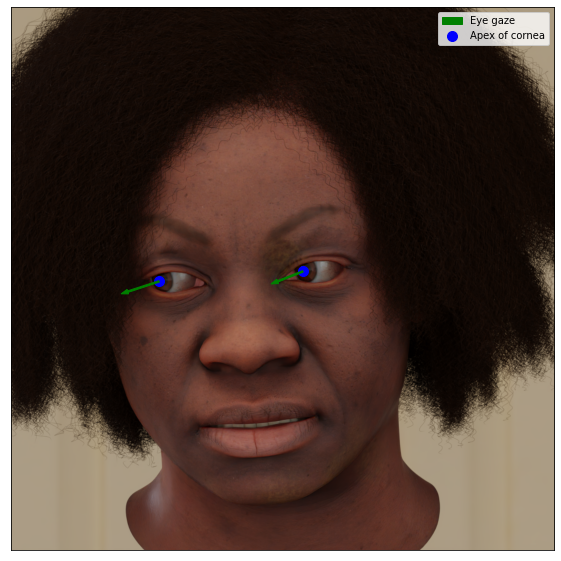

In [132]:
imshow(dp.rgb_img)
plt.scatter(*np.flip(dp.apex_of_cornea_point.key_2d.camera.left_eye), color='b', s=100, label='Apex of cornea')
plt.scatter(*np.flip(dp.apex_of_cornea_point.key_2d.camera.right_eye), color='b', s=100)
plt.arrow(*eye_left_img, *(gaze_left_img - eye_left_img), color='g', label='Eye gaze', width=3)
plt.arrow(*eye_right_img, *(gaze_right_img - eye_right_img), color='g', width=3)
plt.legend()

## Translation from gaze vector to Euler angles

Let's get first the gaze vector in camera coordinates <br>
To do so, we'll apply the extrinsic matrix without the translation row (since we're working with vectors)

In [133]:
extrinsic_rotation = dp.extrinsic_matrix[:, :3]
gaze_left_cam = extrinsic_rotation @ gaze_left_world

This is the coordinates system viewed from the camera: <br>
![title](Images/eye_gaze.png) <br>
$\vec{v}$ is the gaze vector. Pitch and yaw are defined as below:<br><br>
$d = \sqrt{x^2 + y^2} $<br>
$cos(yaw) = -z/d$<br>
$tan(pitch) = -y/d$<br>

Therefore:<br>
$yaw = cos^{-1} (-z/d)$<br>
$pitch = tan^{-1} (-y/d)$<br>

In [145]:

d = np.sqrt(gaze_left_cam[0]**2 + gaze_left_cam[2]**2)
eye_yaw = np.rad2deg(np.arccos(-gaze_left_cam[2]/ d))
eye_pitch = np.rad2deg(np.arctan2(-gaze_left_cam[1], d))

print(f'Left eye gaze yaw: {eye_yaw} degrees')
print(f'Left eye gaze pitch: {eye_pitch} degrees')

Left eye gaze yaw: 30.623516610533795 degrees
Left eye gaze pitch: -11.325526423703453 degrees


## Eyelids dense keypoints
Let's plot the dense keypoints for the eyelids

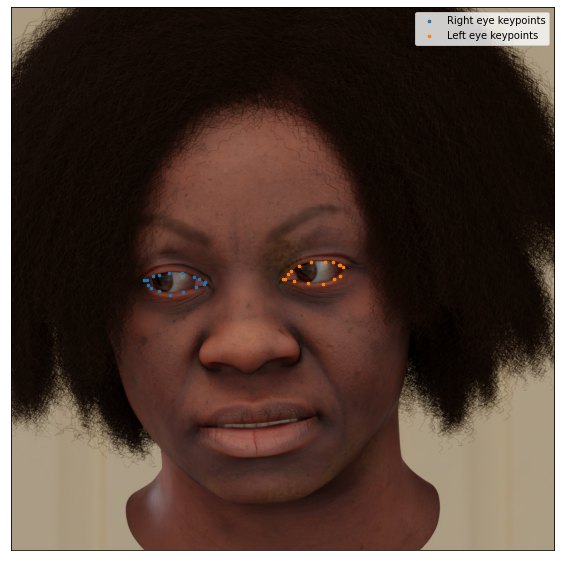

In [136]:
right_eye_kpts = [33, 246, 161, 160, 159, 158, 157, 173, 133, 155, 154, 153, 145, 144, 163, 7]
left_eye_kpts = [362, 398, 384, 385, 386, 387, 388, 466, 263, 249, 390, 373, 374, 380, 381, 382]

imshow(dp.rgb_img)

plt.scatter(*np.flip(dp.dense_keypoints_2d_coordinates[right_eye_kpts]).T, s=7, label='Right eye keypoints')
plt.scatter(*np.flip(dp.dense_keypoints_2d_coordinates[left_eye_kpts]).T, s=7, label='Left eye keypoints')
plt.legend()